#  Data science Customer Churn Prediction Project

**Name**: Thato Maelane   
**Email**: thato6216@gmail.com  
**LinkedIn**: [https://www.linkedin.com/in/thatomaelane](https://www.linkedin.com/in/thatomaelane)  
**GitHub**: [https://github.com/thatomaelane](https://github.com/thatomaelane)  
**Kaggle**: [https://www.kaggle.com/thatomaelane](https://www.kaggle.com/thatomaelane)  
**Date**: 23 June 2025

---

*This notebook presents a machine learning approach to Customer Churn Prediction using logistic regression,random forest models and XGBOOST.*


**Libraries**

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Public Telco Customer Churn dataset**

In [53]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Information of the First 5 Customers**

In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Number of Customers(Shape of the dataset)**

In [55]:
df.shape

(7043, 21)

**General info (columns, data types, nulls)**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Summary statistics for numeric columns**

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**"Yes" → the customer has left (churned) and "No" → the customer is still active So 5174 customers stayed and 1869 customers left (churned)**

In [58]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**Features**

In [59]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Check for missing Values**

In [60]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Converting TotalCharges to numeric**

In [61]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

**Check for missing Values**

In [62]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Dropping Missing Values**

In [63]:
df.dropna(inplace = True)

**Number of Customers after dropping missing values**

In [64]:
df.shape

(7032, 21)

**Dropping customerID it doesn’t help with the predictions**

In [65]:
df.drop('customerID', axis = 1, inplace = True)

**Checking data types**

In [66]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

**Converting binary columns (Yes/No, Male/Female)**

In [67]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

C:\Users\thato\AppData\Local\Temp\ipykernel_40728\197216384.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


**Converting binary columns (Yes/No, Male/Female)**

In [68]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

C:\Users\thato\AppData\Local\Temp\ipykernel_40728\3014946458.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})


 **One-Hot Encode columns with more than two categories**

In [69]:
df = pd.get_dummies(df, drop_first = True)

**Checking data types**

In [70]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

**Creating a scaler**

In [71]:
scaler = StandardScaler()

**features (excluding the label column 'Churn')**

In [72]:
x = df.drop('Churn', axis = 1)

**Scaling the features**

In [73]:
X_scaled = scaler.fit_transform(x)

**Labels stay the same**

In [74]:
y = df['Churn']

**Splitting the Data into Training and Testing Sets**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,   # Features Matrix
    y,          # Target Vector
    test_size=0.3,       # 30% goes to testing, 70% for training
    random_state=42,     # For repeatability (you get the same result every time)
    stratify=y           # Keeps the same churn ratio in both sets
)


**Instintiate the LogisticRegression model**

In [76]:
lr_model = LogisticRegression(max_iter=1000)  # max_iter prevents convergence warnings

**Training the LogisticRegression model**

In [77]:
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Make predictions on test data**

In [78]:
y_pred = lr_model.predict(X_test)

**Confusion Matrix(Logistic Regression)**

In [79]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1384  165]
 [ 242  319]]


**Classification Report(Logistic Regression)**

In [80]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



**Confusion Matrix(Logistic Regression) Heatmap**

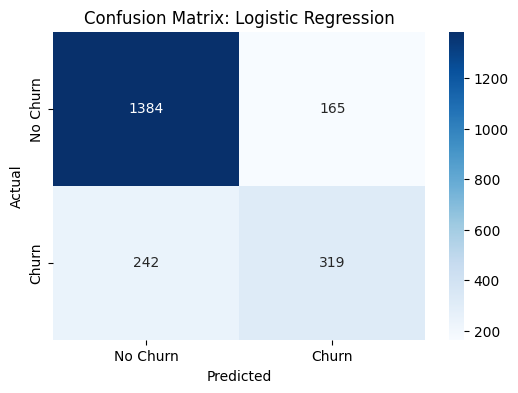

In [81]:
cm_log = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["No Churn", "Churn"], 
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


**Instintiate the Random Forest model**

In [82]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

**Training the Random Forest model**

In [83]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Make predictions on test data**

In [84]:
rf_predictions = rf_model.predict(X_test)

**Confusion Matrix(Random Forest)**

In [85]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

Random Forest Confusion Matrix:
[[1387  162]
 [ 287  274]]


**Classification Report(Random Forest)**

In [86]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



**Confusion Matrix(Random Forest) Heatmap**

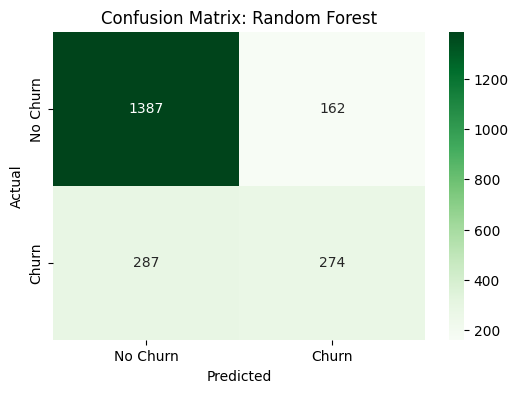

In [87]:
cm_rf = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["No Churn", "Churn"], 
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Random Forest")
plt.show()

**Instintiate the XGBoost model**

In [88]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

**Training the XGBoost model**

In [89]:
xgb_model.fit(X_train, y_train)

C:\Users\thato\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:24:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


**Make predictions on test data**

In [90]:
xgb_predictions = xgb_model.predict(X_test)

**Confusion Matrix(XGBoost)**

In [91]:
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))

XGBoost Confusion Matrix:
[[1361  188]
 [ 276  285]]


**Classification Report(XGBoost)**

In [92]:
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



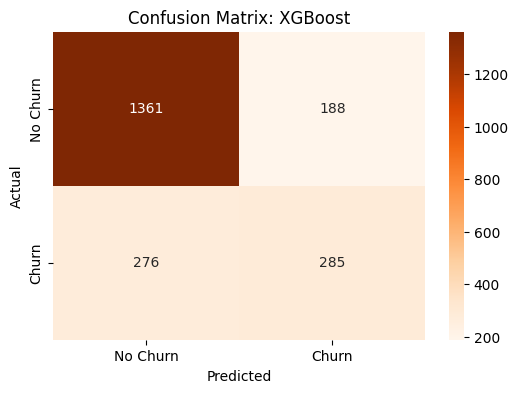

In [93]:
cm_xgb = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges", 
            xticklabels=["No Churn", "Churn"], 
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: XGBoost")
plt.show()